# BL40A2030 Wireless Communication Networks

## Week 4 - Assignment

### Author: Alex Beattie

In [2]:
import sympy as sp
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import queue
import copy
from matplotlib import style
from scipy.spatial import distance
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

**1. (Propagation effects in wireless transmission) When modeling wireless links, we can cite three main effects: distance-dependent path-loss, slow fading and fast fading.**

(a) Explain with your own words these three effects.

Distance-dependent-path-loss is a deterministic or empirical parameter that determines how the signal power will degrade in relation
to distance. This parameter causes the power loss to operation in a factor of $d^2$ so doubling the distance will square
the power reduction.

Slow fading is the presence of large objects (ex. mountains or buildings) that produce a shadow in the signal. This means that the
average received power level can vary. It can be
represented as abnormal distributed random variable.

Fast fading is small scale fast variations that occur for a variety of reasons. This can be caused by multiple paths
between the transmitter and receiver from reflection off of surrounding objects. This can also happen if multiple
replicas of a transmitted signal reach the receiver at the same time.

Aggregating these parameters can give a relatively accurate representation of how the signal strength will behave in relation to the distance from the receiver.

(b) A distance dependent path-loss states a relation between the power of the signal as a function of the distance that the signal have travelled. Plot $P = d^{-\alpha}$ where $\alpha$ is the path-loss exponent. Consider: $1\leq d \leq 5$ for four values of path loss exponends: $\alpha=2, 3, 4, 5$.

Text(0, 0.5, 'Probability $P$')

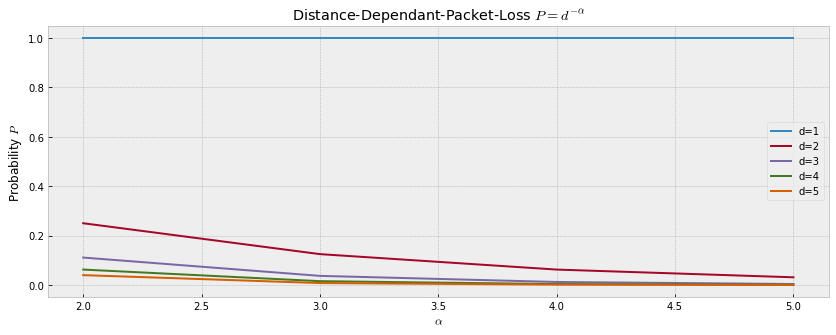

In [9]:

alpha = range(2,6)
mu =3
series = []
plt.figure(figsize=(14,5))
for d in range(1,6):


    prob = [d ** (-a) for a in alpha ]
    temp_plt = plt.plot(alpha,prob, label=f'd={d}' )

plt.title("Distance-Dependant-Packet-Loss $P = d^{-\\alpha}$")
plt.legend()
plt.xlabel("$\\alpha$")
plt.ylabel("Probability $P$")


(c) What is the impact of $\alpha$ in relation to the interference level experienced by a given receiver at a given distance $d$ from the interferer transmitter?

Except for the case where $d = 1$ where any value of $\alpha$ will produce a probability of one, increasing the alpha value
will decrease the probability P. The effect is more pronounced for smaller values of d. This means that at close distances
to the receiver, increasing the alpha value will more significantly decrease the interference level experienced by the receiver.
This indicates that having too strong of a signal at close distances will increase interference.

*Note: In the text, the path-loss exponent is also denoted by $\eta$. In this case, $\alpha$ and $\eta$ refer to the same thing (other authors use even other notations). I prefer to use $\alpha$.*

**2. (Interference models) Explain with your own words the following models and their differences** 

- Collision channel model

    In the collision channel model, if two messages are transmit across the same channel at the same time, all messages
    are assumed to be lost. This does not take into account the transmit power level of either message.

- Capture channel model

    In the capture channel model, if one of the signals has a significantly stronger transmit power and two signals
    are transmitted at the same time then it is possible for the one with stronger power to be received. This is a more
    realistic model because the radio capture phenomenon has been empirically observed.

- Vulnerability circle capture model

    This radio capture model states that only transmitters that are within a given vulnerability circle with radius
    defined mathematically will interfere with each other. This model only considers pairwise transmission interference
    and does not factor in multiple simultaneous transmissions. A message will be successfully received in this model
    if the receive power execeeds the individual receive power of any other message.

- Power capture model

    This radio capture model states, that a message will be successfully decoded if its receive power exceeds a the aggregate signal
    composed of other messages by a set threshold. This model is more accurate but more complex to calculate which means
    it is not always pratical to use.

**3. (Physical interference model) Explain with your own words equation (3) from [4]:**

$$ \dfrac{P_i |X_i - X_{R(i)}|^{-\alpha}}{\sigma^2 + \sum_{k \in \mathcal{N}, k\ \neq i} P_k |X_k - X_{R(i)}|^{-\alpha} } \geq \beta_p$$

- Meaning of the variables there.

    * $P_i$ - the transmit power of the i-th terminal
    * $\sigma^2$ - effects of the additive noise of power
    * $|X_i - X_{R(i)}|$ - euclidean distance between terminals $X_i$ and $X_{R(i)}$ (the intended receiver)
    * $\alpha$ - path loss exponent
    * $ \beta_p$ - receiver power threshold
    * $\sum_{k \in \mathcal{N}, k\ \neq i} P_k |X_k - X_{R(i)}|^{-\alpha}$ - The sum of the interference from all other nodes
      considering their transmit power and distance

- Identify the sources of uncertainty on these variables.

    There are a variety of sources for potential uncertainty in these variables. For example if the receivers or senders
    are moving then the euclidean distance will be changing or uncertain. It is also possible that the transmitters will change
    their transmit power which will alter the value of P.

- Rewrite here a simplified version of this equation when: Noise and fading are neglected, the transmit power from all transmitters are the same, and the receiver is located at the origin i.e. (0, 0). Which are the possible source of uncertainty in this case?

    The simplified version of this equation as described is the SIR (signal-to-Interference Ratio) equation.

$$ \dfrac{P_{r,i}}{ \sum_{j\ \neq i} P_{r,j}  } > \beta_p$$

    In this case the potential source of unecertainty is the transmit power of the terminal and other nodes. If the power
    is not stable the entire time then this introduces uncertaintiy in the model.

**4. (Topologies) Draw in the same plot: (a) random network with 200 nodes in a square $10 \times 10$ uniformly distributed in $x$ and $y$ and (b) square grid with $16$ elements. Do you think this is a good model for a [small-cell](https://en.wikipedia.org/wiki/Small_cell) in a cellular network?**



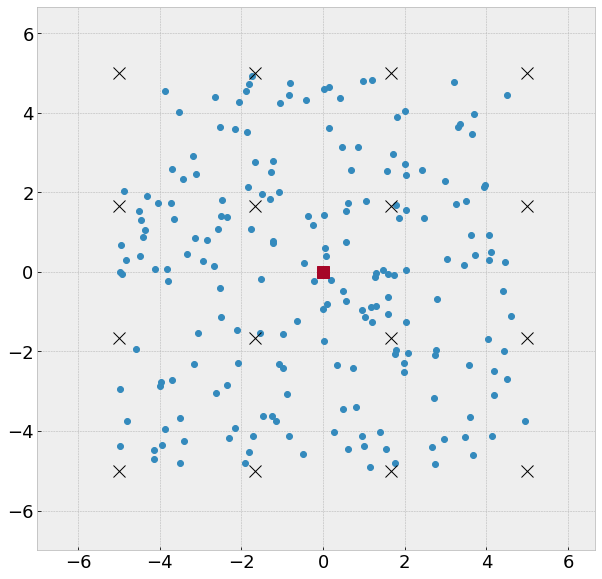

In [48]:
#Network size (square)
L = 10
#This is the sqrt of the number
n = 4
#
#Regular distribution in x
position_x_realization_aux1 = np.linspace(-L/2, L/2 , n) 
#Regular distribution in x
position_y_realization_aux1 = np.linspace(-L/2, L/2 , n) 
#
position_x_realization1, position_y_realization1 = np.meshgrid(position_x_realization_aux1, position_y_realization_aux1)
#####
#Regular distribution in x
position_x_realization_aux2 = np.linspace(-L/2 + (position_x_realization_aux1[1] - position_x_realization_aux1[0])/2, L/2 + (position_x_realization_aux1[1] - position_x_realization_aux1[0])/2 , n) 
#Regular distribution in x
position_y_realization_aux2 = np.linspace(-L/2 + (position_y_realization_aux1[1] - position_y_realization_aux1[0])/2, L/2 + (position_y_realization_aux1[1] - position_y_realization_aux1[0])/2 , n) 
#
position_x_realization2, position_y_realization2 = np.meshgrid(position_x_realization_aux2, position_y_realization_aux2)


## Random topology


#Network size (square)
L = 10
#Number of nodes
n = 200
#
#Uniform distribution in x
position_x_realization = np.random.uniform(-L/2,L/2,n)

#Uniform distribution in y
position_y_realization = np.random.uniform(-L/2,L/2,n)

# Figure
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10, 10))
plt.plot(position_x_realization, position_y_realization, 'o')
plt.plot(0, 0, 's',markersize=12)
plt.plot(position_x_realization1, position_y_realization1, 'k x',markersize=12)
plt.xlim(-L/2-2,L/2 + (position_x_realization_aux1[1] - position_x_realization_aux1[0])/2 )
plt.ylim(-L/2-2,L/2 + (position_y_realization_aux1[1] - position_y_realization_aux1[0])/2 )
plt.show()


Since the nodes are randomly distributed this is a good model for a small-cell in a cellular network. Because of the randomness
there is no way to know if there will be a location of higher density then expected. If the designer knew more about the situation
then they could create a more optimized small-cell network. For example if you knew that this was an office and the kitchen
was in the bottom left, you could conclude that there would be a lot of people there at one time during lunch who would all be using
their phones over the network. This would create a hotspot in that area which may require additional access points.